In [71]:
!pip install nltk
!pip3 install flair
!pip install textblob

!pip install stanza
!pip install spacy

In [72]:
import numpy as np
import pandas as pd

In [73]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [74]:
# Stanza NLP CNN 
'''
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)
def stanza_funct(text):
    data = stNLP(text)
    for i, sentence in enumerate(data.sentences):
        return i, sentence.sentiment
'''

"\nimport stanza\nstanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)\nstNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)\ndef stanza_funct(text):\n    data = stNLP(text)\n    for i, sentence in enumerate(data.sentences):\n        return i, sentence.sentiment\n"

In [75]:
# SpaCy
# TextCategorizer
import spacy
from spacy.pipeline import TextCategorizer

spNLP = spacy.load('en_core_web_sm')
textcat = spNLP.create_pipe(name='textcat', config={'exclusive_classes': True})
textcat = TextCategorizer(spNLP.vocab)

In [76]:
text = spNLP('this is a sentence.')
#processed = textcat(text)

In [77]:
from textblob import TextBlob

In [78]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-08-28 22:41:58,147 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


In [79]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [80]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [81]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

---

## **Comparing outputs**

---

### **data (text)**

In [82]:
#data = "Is a fact the sky is yellow submarine"
#data = "is a fact this sentence is subjective and neutral, but I love it"
data = 'I love working hard! The following sentence is a fact: done school examen! easy peasy so proud of myself!!!'

### Sentiment Intentisity Analyzer

In [83]:
SIA.polarity_scores(data)

{'compound': 0.9111, 'neg': 0.053, 'neu': 0.455, 'pos': 0.492}

In [84]:
print([i for i in data.split()])
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
[0.0, 0.6369, 0.0, -0.1759, 0.0, 0.0, 0.0772, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4404, 0.0, 0.0, 0.4767, 0.0, 0.0]


In [85]:
siaVader_compound(data)

'pos'

In [86]:
print([i for i in data.split()])
print([(lambda x: siaVader_compound(x))(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
['neu', 'pos', 'neu', 'neg', 'neu', 'neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'pos', 'neu', 'neu']


In [87]:
siaVader_maxScore(data)

'pos'

In [88]:
print([i for i in data.split()])
print([(lambda x: siaVader_maxScore(x))(x) for x in data.split()])

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']
['neg', 'pos', 'neu', 'neg', 'neu', 'neu', 'pos', 'neu', 'neg', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'pos', 'neu', 'neu']


### TextBlob subjective

In [89]:
text_blob_subjective(data)

Sentiment(polarity=0.31375000000000003, subjectivity=0.615)

In [90]:
[(lambda x: text_blob_subjective(x))(x) for x in data.split()]

[Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.6),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=-0.36458333333333337, subjectivity=0.5416666666666666),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.1),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.43333333333333335, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=1.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0)]

### Flair LSTM prediction

In [91]:
flair_lstm(data)

[POSITIVE (0.9965)]

In [92]:
print([i for i in data.split()])
[(lambda x: flair_lstm(x))(x) for x in data.split()]

['I', 'love', 'working', 'hard!', 'The', 'following', 'sentence', 'is', 'a', 'fact:', 'done', 'school', 'examen!', 'easy', 'peasy', 'so', 'proud', 'of', 'myself!!!']


[[POSITIVE (0.7267)],
 [POSITIVE (0.977)],
 [POSITIVE (0.9844)],
 [NEGATIVE (0.5737)],
 [POSITIVE (0.7762)],
 [POSITIVE (0.9282)],
 [NEGATIVE (0.9479)],
 [POSITIVE (0.7504)],
 [POSITIVE (0.9447)],
 [POSITIVE (0.9891)],
 [POSITIVE (0.9562)],
 [POSITIVE (0.9738)],
 [POSITIVE (0.825)],
 [POSITIVE (0.6901)],
 [POSITIVE (0.9985)],
 [NEGATIVE (0.9702)],
 [POSITIVE (0.9937)],
 [POSITIVE (0.8965)],
 [POSITIVE (0.9473)]]

# **Graphs**

In [93]:
import matplotlib.pyplot as plt
import numpy as np

In [94]:
y_flair = [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data.split()]]
y_flair = [x for b in y_flair for x in b]

In [95]:
x_flair = range(len(y_flair))

In [96]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data.split()])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data.split()])

In [97]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()]

## **Plotting bars**

In [103]:
def plot_bar(p1y, p2y, p3y, p4y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('range')
    plt.ylabel('scores')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

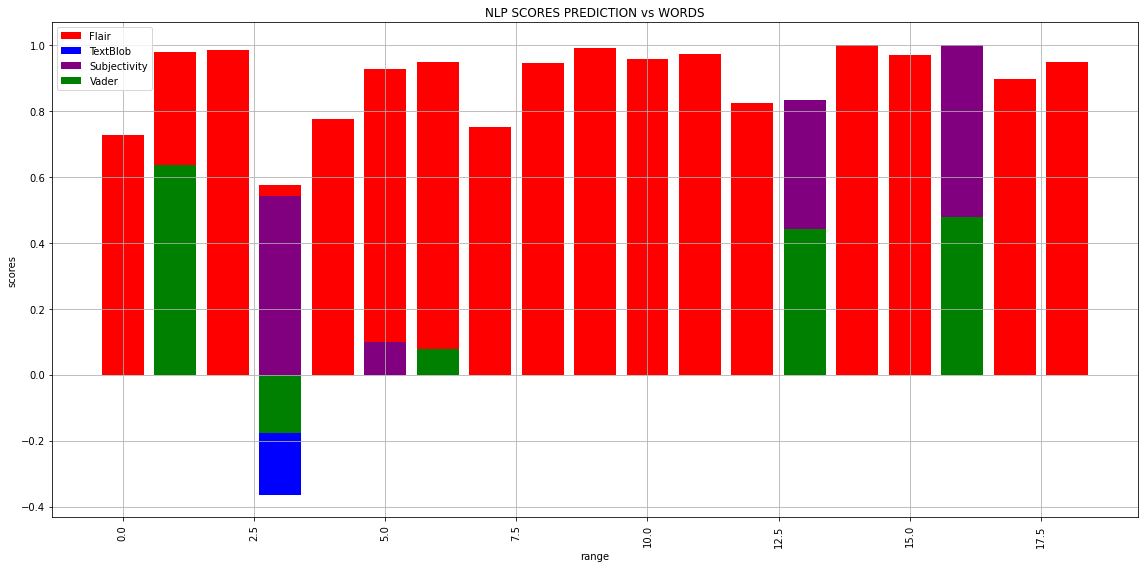

In [114]:
plot_bar(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    x=x_flair,
    size=(16,  8)
)

## **Plotting lines**

In [111]:
def plot_lines(p1y, p2y, p3y, p4y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('length')
    plt.ylabel('scores')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

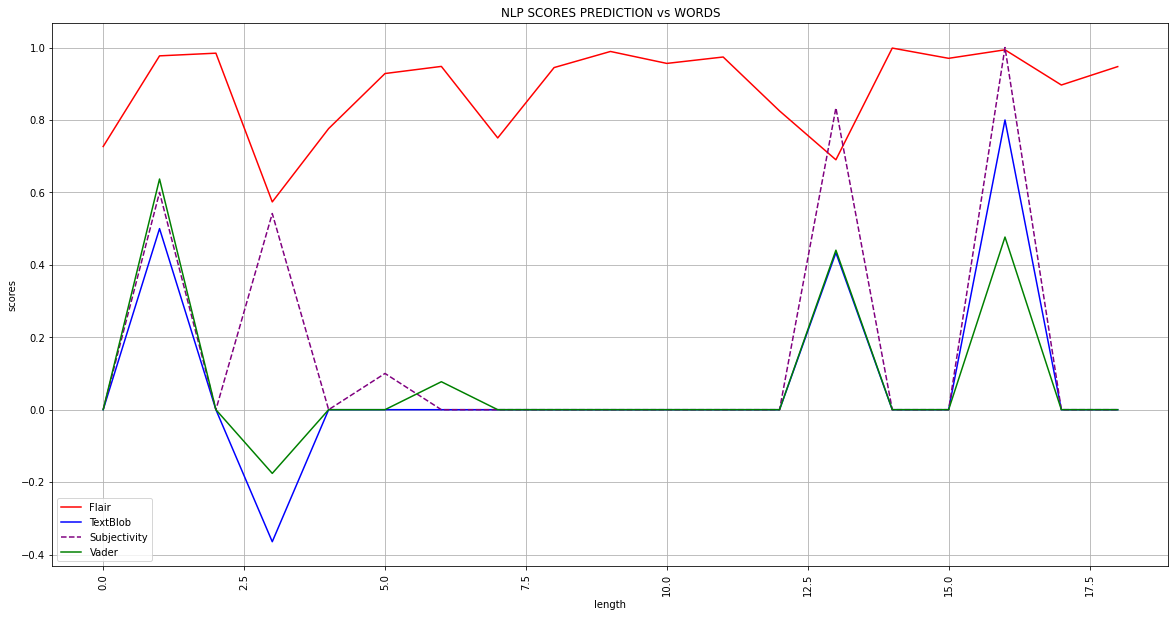

In [115]:
plot_lines(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    x=x_flair,
    size=(20,  10)
)